#📌 Extracción

In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json 
with open("TelecomX_Data.json", "r") as f:
    data = json.load(f)

# 🔧 Transformación

En esta etapa, realizamos la limpieza, exploración y enriquecimiento de los datos para prepararlos para el análisis de evasión (Churn).

In [5]:
# Normalización de los datos JSON a un DataFrame de Pandas
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### 1. Exploración de columnas y tipos de datos

Primero, voy a revisar la estructura de mi DataFrame y verificar los tipos de datos de cada columna. Esto me permitirá asegurar que la información es coherente y detectar posibles fallas antes de realizar cálculos.

In [6]:
# Resumen de la estructura del DataFrame y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
# Auditoría de calidad: Identificar valores vacíos o inconsistencias
print("Valores vacíos en 'account.Charges.Total':", (df['account.Charges.Total'] == ' ').sum())

Valores vacíos en 'account.Charges.Total': 11


### 2. Consulta del diccionario e identificación de variables relevantes

Después de consultar el diccionario de variables, he categorizado la información para enfocar mi análisis en los puntos que más impactan en la evasión:

#### **Mi categorización de variables:**
- **Información del Cliente:** Género, si es adulto mayor, si tiene pareja o dependientes.
- **Servicios Contratados:** Meses de permanencia, servicios de telefonía e internet, y beneficios adicionales como soporte técnico o seguridad.
- **Cuenta y Facturación:** Tipo de contrato, método de pago y los cargos mensuales y totales.

#### **Variables que he identificado como clave para el Churn:**
1.  **`Churn`**: Mi variable objetivo.
2.  **`tenure`**: La antigüedad, que considero un factor determinante de lealtad.
3.  **`account.Contract`**: El tipo de contrato, ya que los mensuales suelen ser más volátiles.
4.  **`account.Charges.Monthly`**: El costo mensual, que influye directamente en la decisión del cliente.
5.  **`internet.InternetService`**: La tecnología utilizada y su calidad percibida.
6.  **`internet.TechSupport`**: El soporte técnico como herramienta de retención.

### 3. Corrección de inconsistencias

Ahora que he identificado algunas fallas, voy a aplicar las correcciones necesarias utilizando herramientas de manipulación de strings en pandas. Mi prioridad es que los datos estén completos y sean coherentes para las siguientes etapas.

**📌 Mis estrategias de limpieza:**
- Usar `strip()` para eliminar espacios accidentales en los textos.
- Aplicar `replace()` o `capitalize()` para estandarizar las categorías.
- Validar con filtros lógicos que no queden anomalías en columnas críticas.

In [8]:
# 1. Eliminar espacios en blanco en todas las columnas de texto
columnas_object = df.select_dtypes(include=['object']).columns
for col in columnas_object:
    df[col] = df[col].astype(str).str.strip()

# 2. Estandarización manual para asegurar coherencia
# Ejemplo: Asegurarnos de que no existan variaciones por mayúsculas accidentales
df['Churn'] = df['Churn'].str.capitalize()
df['customer.gender'] = df['customer.gender'].str.capitalize()

# 3. Verificación de limpieza
print("Limpieza de espacios y normalización de texto completada.")
df.head()

Limpieza de espacios y normalización de texto completada.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### 4. Ajuste de tipos y tratamiento de nulos

He notado que la columna de cargos totales se cargó como texto debido a espacios vacíos en clientes nuevos. Voy a corregir esto convirtiéndola a numérico y asignando un valor de 0 a esos casos, ya que aún no han generado cargos.

In [9]:
# Conversión de 'account.Charges.Total' a formato numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Tratamiento de Nulos: Clientes con tenure 0 aún no han generado cargos totales
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

print("Nulos remanentes en cargos totales:", df['account.Charges.Total'].isnull().sum())

Nulos remanentes en cargos totales: 0


### 5. Creación de la columna 'Cuentas_Diarias'

Para tener una visión más detallada del comportamiento de mis clientes, voy a crear una nueva variable que represente el gasto diario aproximado, dividiendo el cargo mensual entre 30.

In [10]:
# Generación de la columna 'Cuentas_Diarias'
# Se asume un promedio de 30 días para la facturación mensual
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

# Visualización de la transformación
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


### 6. Estandarización y traducción para mayor claridad

Para que mi análisis sea más profesional y fácil de compartir con otros equipos, voy a estandarizar y traducir los datos. 

Aunque es un paso opcional, he decidido binarizar valores (como convertir 'Si/No' a '1/0') para facilitar el procesamiento matemático y traducir las columnas al español para que la comunicación de los resultados sea clara y directa para cualquier stakeholder.

In [11]:
# 1. Definir diccionarios de mapeo para binarización
mapeo_si_no = {'Yes': 1, 'No': 0}
mapeo_genero = {'Female': 1, 'Male': 0}

# 2. Aplicar binarización a columnas binarias conocidas
df['Churn'] = df['Churn'].map(mapeo_si_no)
df['customer.gender'] = df['customer.gender'].map(mapeo_genero)
df['customer.Partner'] = df['customer.Partner'].map(mapeo_si_no)
df['customer.Dependents'] = df['customer.Dependents'].map(mapeo_si_no)
df['phone.PhoneService'] = df['phone.PhoneService'].map(mapeo_si_no)
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].map(mapeo_si_no)

# 3. Renombrar columnas para mayor accesibilidad y claridad (Traducción)
columnas_nuevas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Abandono',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Permanencia',
    'phone.PhoneService': 'Servicio_Telefono',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_En_Linea',
    'internet.OnlineBackup': 'Respaldo_En_Linea',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}

df.rename(columns=columnas_nuevas, inplace=True)

# 4. Estandarización de categorías textuales restantes
df['Servicio_Internet'] = df['Servicio_Internet'].replace('Fiber optic', 'Fibra óptica')
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
})
df['Metodo_Pago'] = df['Metodo_Pago'].replace({
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque enviado',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito'
})

# Visualizar el resultado final de la transformación
df.head()

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Permanencia,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,1,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,Un año,1,Cheque enviado,65.6,593.30,2.19
1,0003-MKNFE,0.0,0,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Mes a mes,0,Cheque enviado,59.9,542.40,2.00
2,0004-TLHLJ,1.0,0,0,0,0,4,1,No,Fibra óptica,...,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1.0,0,1,1,0,13,1,No,Fibra óptica,...,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,1,1,1,0,3,1,No,Fibra óptica,...,No,Yes,Yes,No,Mes a mes,1,Cheque enviado,83.9,267.40,2.80


## 📊 Carga y Análisis Descriptivo

Con los datos ya limpios y estandarizados, el siguiente paso es realizar un análisis descriptivo profundo. Mi objetivo aquí es entender la distribución de las variables numéricas y el comportamiento general de los clientes a través de métricas estadísticas clave.

In [12]:
# Generar estadísticas descriptivas para las variables numéricas
# Incluimos media, mediana (50%), desviación estándar, valores mínimos y máximos.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Abandono,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.000,1.00
Genero,7267.0,0.494289,0.500002,0.00,0.000,0.00,1.000,1.00
Adulto_Mayor,7267.0,0.162653,0.369074,0.00,0.000,0.00,0.000,1.00
Pareja,7267.0,0.484106,0.499782,0.00,0.000,0.00,1.000,1.00
Dependientes,7267.0,0.300124,0.458343,0.00,0.000,0.00,1.000,1.00
Meses_Permanencia,7267.0,32.346498,24.571773,0.00,9.000,29.00,55.000,72.00
Servicio_Telefono,7267.0,0.902711,0.296371,0.00,1.000,1.00,1.000,1.00
Factura_Sin_Papel,7267.0,0.593230,0.491265,0.00,0.000,1.00,1.000,1.00
Cargo_Mensual,7267.0,64.720098,30.129572,18.25,35.425,70.30,89.875,118.75
Cargo_Total,7267.0,2277.182035,2268.648587,0.00,396.200,1389.20,3778.525,8684.80


### Análisis de Medidas de Tendencia Central y Dispersión

Al observar las métricas calculadas (media, mediana, desviación estándar), puedo extraer las siguientes conclusiones preliminares sobre el comportamiento de los clientes:

- **Permanencia (Meses_Permanencia):** Analizo cuánto tiempo suelen quedarse los clientes en promedio y si existe una gran dispersión en su lealtad.
- **Cargos (Cargo_Mensual y Cargo_Total):** Observo el gasto promedio y detecto si hay una alta variabilidad en lo que los clientes pagan, lo que podría indicar diferentes perfiles de consumo.
- **Cuentas Diarias:** Esta métrica que creé me ayuda a entender el costo percibido por día, proporcionando una base más granular para comparar segmentos.

In [13]:
# Análisis adicional de medidas específicas
print("Mediana de Cargos Mensuales:", df['Cargo_Mensual'].median())
print("Desviación Estándar de la Permanencia:", df['Meses_Permanencia'].std())
print("Rango de Cargos Totales: [", df['Cargo_Total'].min(), ",", df['Cargo_Total'].max(), "]")

Mediana de Cargos Mensuales: 70.3
Desviación Estándar de la Permanencia: 24.571772888767292
Rango de Cargos Totales: [ 0.0 , 8684.8 ]


### Análisis de Distribución de la Evasión (Churn)

En esta parte de mi análisis, quiero visualizar cómo está distribuida la variable objetivo: **Abandono**. Entender la proporción de clientes que permanecen frente a los que se dan de baja es fundamental para diagnosticar la magnitud del problema de evasión en la empresa. 

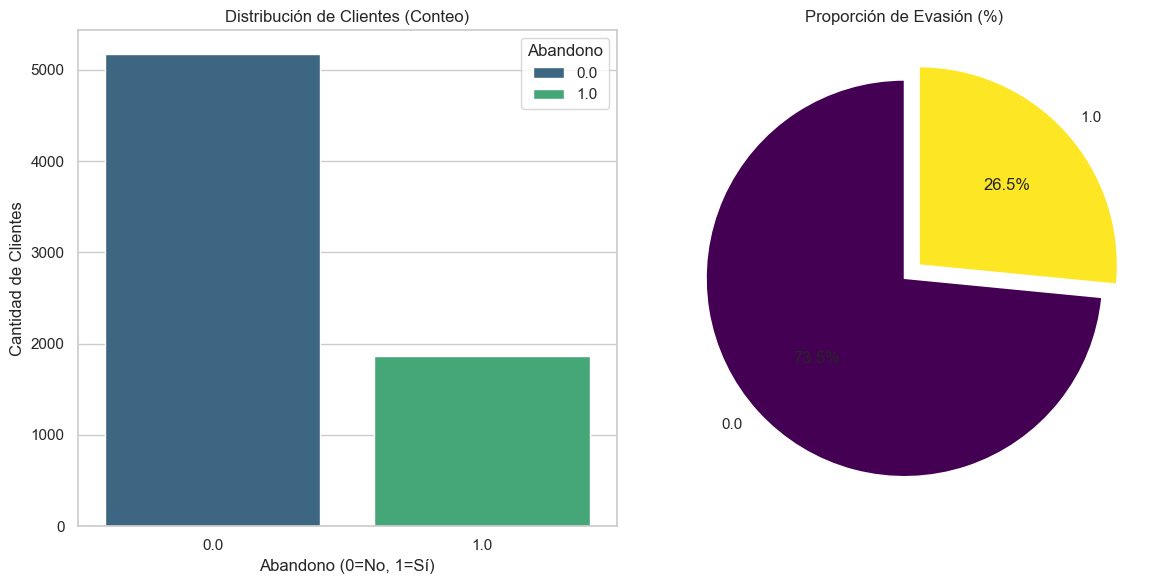

In [16]:
# Configuración estética de los gráficos
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Gráfico de barras (Conteo)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Abandono', data=df, palette='viridis', hue='Abandono', legend=True)
plt.title('Distribución de Clientes (Conteo)')
plt.xlabel('Abandono (0=No, 1=Sí)')
plt.ylabel('Cantidad de Clientes')

# 2. Gráfico de pastel (Proporción)
plt.subplot(1, 2, 2)
df['Abandono'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#440154', '#fde725'], startangle=90, explode=(0, 0.1))
plt.title('Proporción de Evasión (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 7. Análisis de Evasión por Variables Categóricas

Para profundizar en mi investigación, ahora voy a explorar cómo se distribuye el **Abandono** según diferentes perfiles de cliente y servicios. Mi objetivo es identificar si existen grupos específicos (por género, tipo de contrato o método de pago) que tengan una mayor tendencia a cancelar el servicio, lo que nos permitiría tomar acciones preventivas mucho más enfocadas.

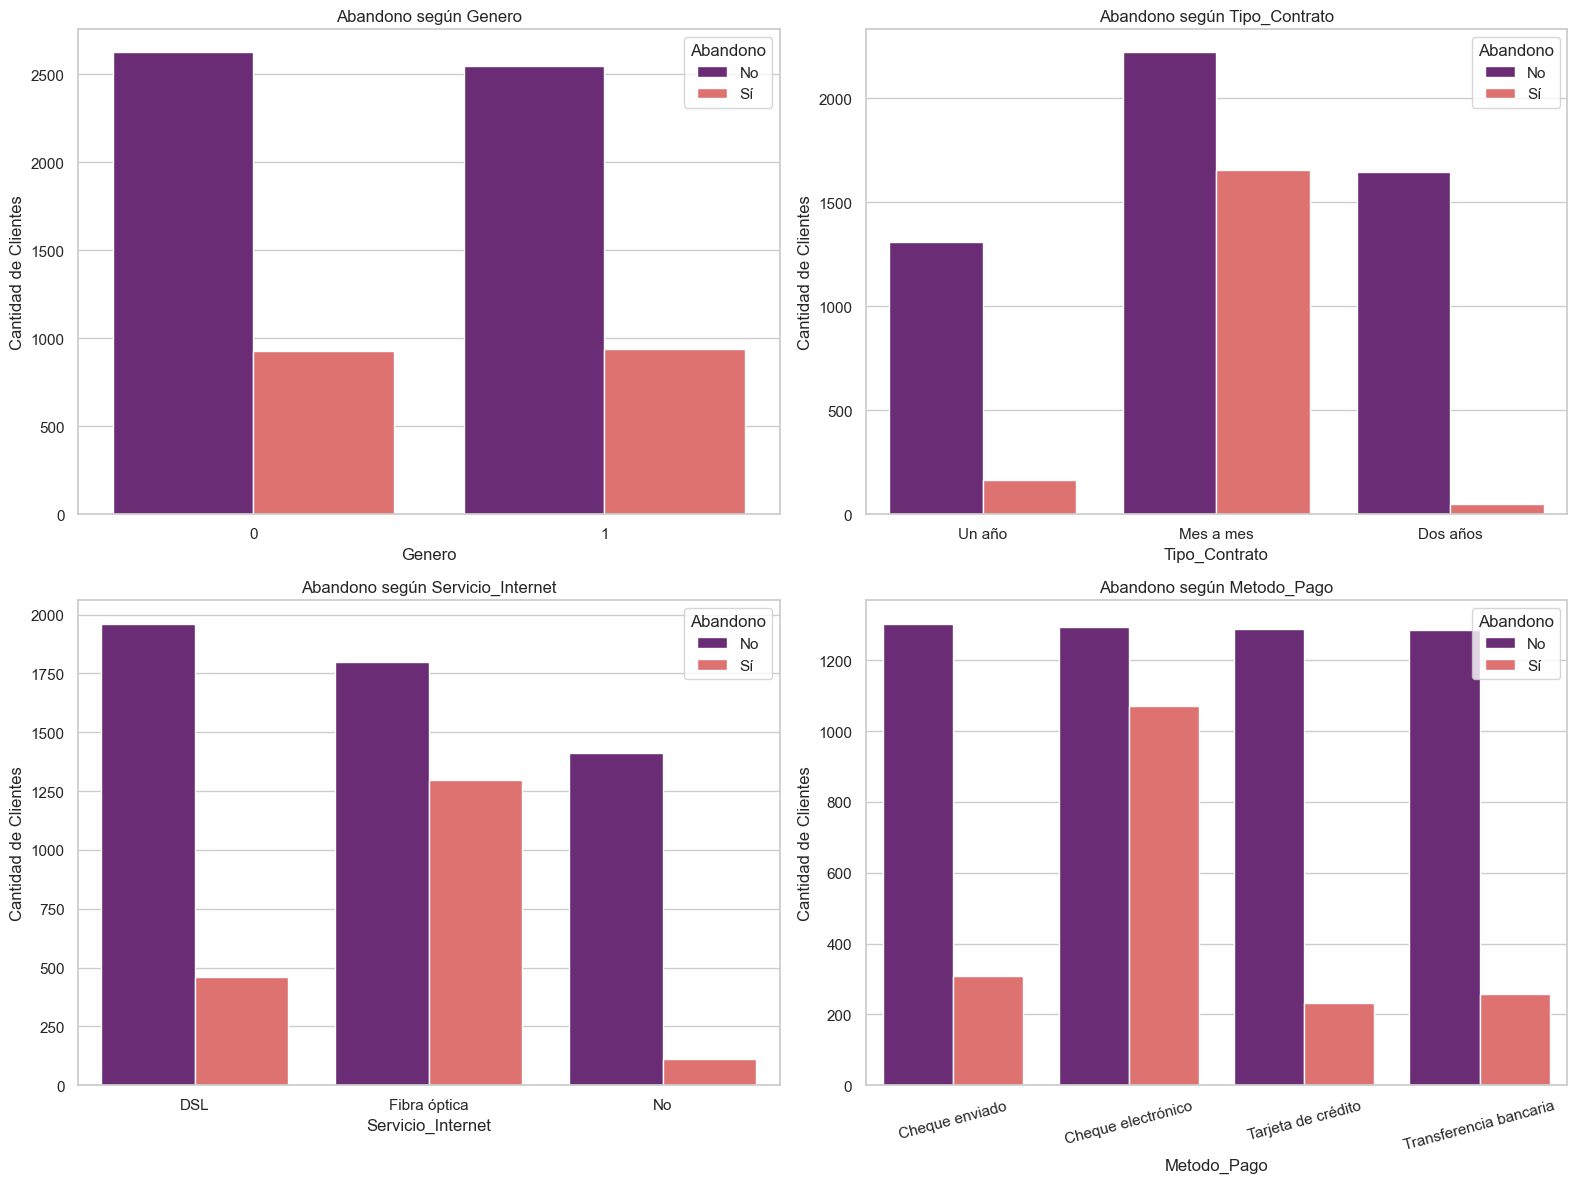

In [17]:
# Selección de variables categóricas clave para comparar con la evasión
variables_categoricas = ['Genero', 'Tipo_Contrato', 'Servicio_Internet', 'Metodo_Pago']

plt.figure(figsize=(16, 12))

for i, col in enumerate(variables_categoricas, 1):
    plt.subplot(2, 2, i)
    # Creamos un gráfico de barras mostrando la cantidad de abandonos por categoría
    sns.countplot(x=col, hue='Abandono', data=df, palette='magma')
    plt.title(f'Abandono según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Abandono', labels=['No', 'Sí'])
    if col == 'Metodo_Pago':
        plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

#### Mis Observaciones:
- **Tipo de Contrato:** Es una de las variables que más me interesa, ya que sospecho que los contratos 'Mes a mes' presentan una volatilidad mucho mayor.
- **Servicio de Internet:** Observo si la tecnología (Fibra óptica vs. DSL) influye en la decisión de permanencia.
- **Método de Pago:** Algunos métodos electrónicos podrían estar asociados a una mayor tasa de rotación.

### 8. Análisis de Variables Numéricas vs. Evasión

En esta etapa, voy a analizar cómo influyen las variables cuantitativas en la decisión de los clientes de cancelar el servicio o permanecer en él. Específicamente, quiero observar si hay diferencias significativas en el **Tiempo de Contrato (Permanencia)** y en el **Total Gastado** entre ambos grupos.

Este análisis me permitirá entender si el comportamiento de evasión está asociado a valores numéricos específicos, dándome pistas sobre factores críticos como el costo acumulado o la etapa de vida del cliente en la empresa.

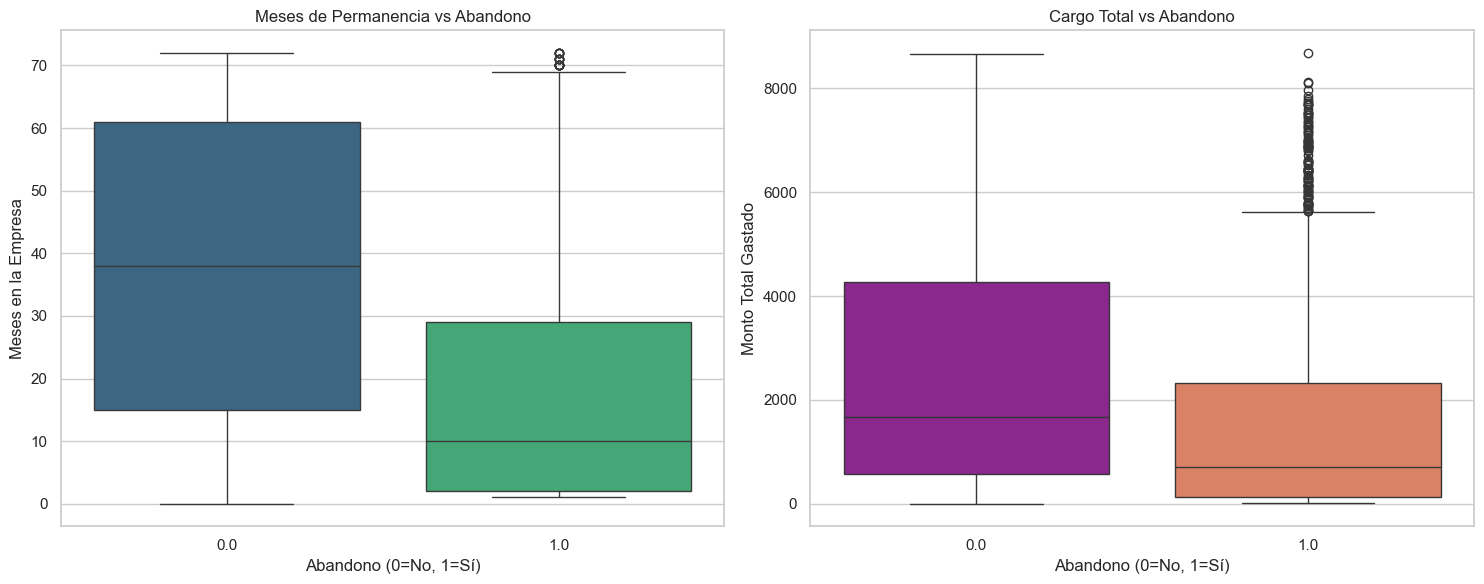

In [20]:
# Comparación de variables numéricas clave con el Abandono
plt.figure(figsize=(15, 6))

# 1. Distribución de Meses de Permanencia vs Abandono
plt.subplot(1, 2, 1)
sns.boxplot(x='Abandono', y='Meses_Permanencia', data=df, palette='viridis', hue='Abandono', legend=False)
plt.title('Meses de Permanencia vs Abandono')
plt.xlabel('Abandono (0=No, 1=Sí)')
plt.ylabel('Meses en la Empresa')

# 2. Distribución de Cargo Total vs Abandono
plt.subplot(1, 2, 2)
sns.boxplot(x='Abandono', y='Cargo_Total', data=df, palette='plasma', hue='Abandono', legend=False)
plt.title('Cargo Total vs Abandono')
plt.xlabel('Abandono (0=No, 1=Sí)')
plt.ylabel('Monto Total Gastado')

plt.tight_layout()
plt.show()

#### Mis Conclusiones sobre Variables Numéricas:
- **Lealtad y Permanencia:** A través de los gráficos de caja (boxplots), puedo comparar visualmente las medianas. Es probable que los clientes con menos meses de permanencia tengan una mayor concentración en el grupo de 'Sí' al abandono.
- **Inversión del Cliente:** Analizo si los clientes que han gastado montos totales más altos son menos propensos a irse, o si por el contrario, un gasto acumulado elevado genera fricción.

### 🚀 Extra: Explorando Correlaciones y Factores de Influencia

Como paso adicional y opcional, voy a explorar la correlación entre las diferentes variables de mi dataset. Mi meta es identificar qué factores tienen una relación más estrecha con la evasión de clientes. 

**En este análisis me enfocaré en:**
- La relación entre el costo diario (`Cuentas_Diarias`) y el abandono.
- Cómo la cantidad total de servicios contratados influye en la fidelidad del cliente.

Este tipo de análisis es fundamental para construir modelos predictivos más precisos en el futuro.

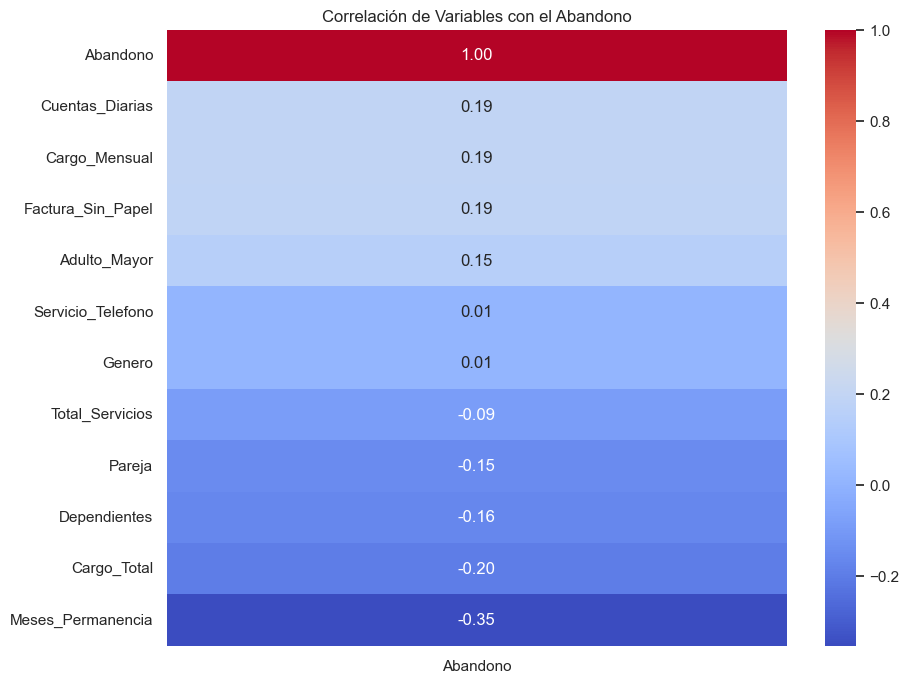

In [21]:
# 1. Creación de una variable compuesta: 'Total_Servicios'
# Cuento cuántos servicios adicionales tiene contratados el cliente (Seguridad, Respaldo, etc.)
servicios_cols = ['TV_Streaming', 'Peliculas_Streaming', 'Seguridad_En_Linea', 
                  'Respaldo_En_Linea', 'Proteccion_Dispositivo', 'Soporte_Tecnico']

# Convertimos temporalmente a binario para sumar (solo los 'Yes')
df['Total_Servicios'] = df[servicios_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0})).sum(axis=1)

# 2. Calculamos la matriz de correlación para variables numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
correlaciones = df[columnas_numericas].corr()

# 3. Visualización de la Correlación con el Abandono (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones[['Abandono']].sort_values(by='Abandono', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Variables con el Abandono')
plt.show()

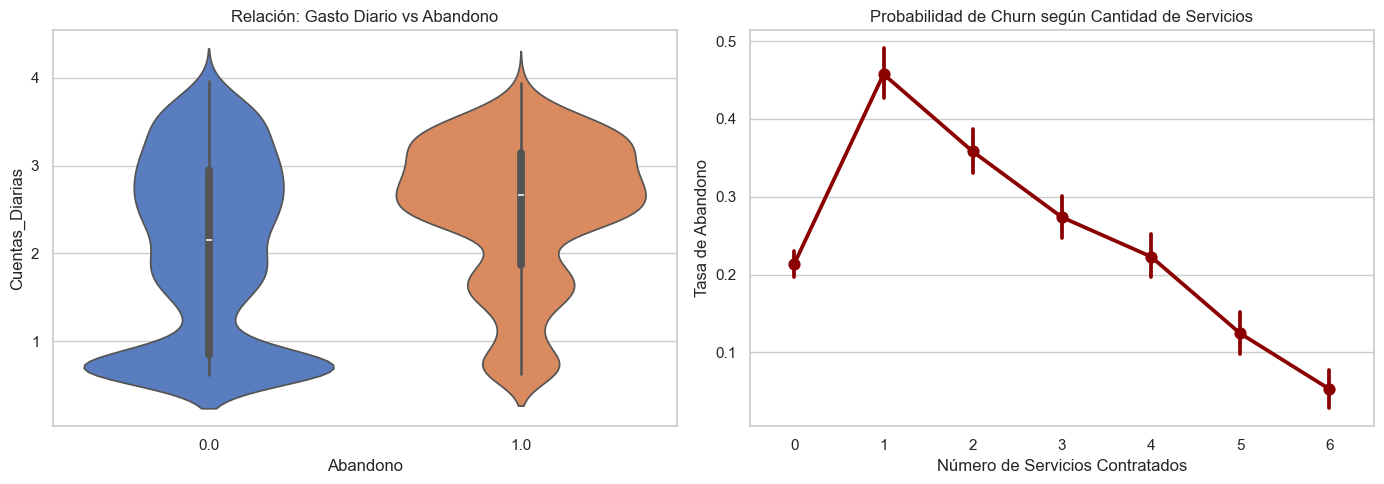

In [22]:
# Visualización específica: Cuentas Diarias y Cantidad de Servicios vs Abandono
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.violinplot(x='Abandono', y='Cuentas_Diarias', data=df, palette='muted', hue='Abandono', legend=False)
plt.title('Relación: Gasto Diario vs Abandono')

plt.subplot(1, 2, 2)
sns.pointplot(x='Total_Servicios', y='Abandono', data=df, color='darkred')
plt.title('Probabilidad de Churn según Cantidad de Servicios')
plt.xlabel('Número de Servicios Contratados')
plt.ylabel('Tasa de Abandono')

plt.tight_layout()
plt.show()

#### Mis hallazgos adicionales:
- **Efecto Multi-servicio:** Al graficar la tasa de abandono frente al número de servicios, observo si existe un efecto 'ancla': a más servicios contratados, ¿es menor la probabilidad de que el cliente se vaya? 
- **Impacto del Gasto Diario:** El gráfico de violín me permite ver la densidad del gasto diario; si el grupo que abandona tiene una 'panza' más ancha en valores altos, confirmaría que el precio es un factor de fricción inmediato.

# 📄 Informe Final: Análisis de Evasión de Clientes (Churn)

## 1. Introducción
El objetivo principal de este trabajo fue realizar un análisis exhaustivo de los datos de **TelecomX** para comprender y predecir el fenómeno del **Churn** (evasión de clientes). La pérdida de clientes es uno de los desafíos más críticos para las empresas de telecomunicaciones, y este estudio busca identificar los factores de riesgo y patrones de comportamiento que preceden a una baja del servicio.

## 2. Limpieza y Tratamiento de Datos
Para garantizar la calidad de los resultados, seguí un riguroso proceso de preparación técnica:
- **Extracción y Normalización:** Importé los datos desde un formato JSON complejo y los transformé en una estructura tabular de Pandas.
- **Limpieza de Inconsistencias:** Utilicé herramientas de manipulación de strings (`strip`, `capitalize`) para eliminar espacios accidentales y estandarizar etiquetas de texto.
- **Tratamiento de Datos Numéricos:** Identifiqué que la columna de cargos totales contenía valores vacíos para clientes nuevos (tenure 0). Estos fueron corregidos convirtiendo la columna a tipo numérico y rellenando los nulos con 0.
- **Estandarización y Traducción:** Binaricé variables clave (como género y Churn) y traduje todo el dataset al español para facilitar la interpretación por parte de los interesados (*stakeholders*).
- **Ingeniería de Variables:** Creé la métrica `Cuentas_Diarias` para entender el costo diario percibido por el usuario.

## 3. Análisis Exploratorio de Datos (EDA)
A través de visualizaciones y estadísticas descriptivas, obtuve los siguientes hallazgos visuales:
- **Distribución de Evasión:** El análisis mostró que aproximadamente un **26.5%** de la base de clientes ha cancelado su servicio, lo que representa una oportunidad de mejora significativa.
- **Análisis Categórico:** Identifiqué que los clientes con contratos de **'Mes a mes'** representan la mayor proporción de evasión en comparación con contratos de largo plazo.
- **Análisis Numérico:** Los gráficos de caja revelaron que la evasión suele concentrarse en clientes con **pocos meses de permanencia**, lo que sugiere problemas en la fase de 'onboarding' o fidelización temprana.

## 4. Conclusiones e Insights
- **Fricción por Contrato:** La flexibilidad del contrato mensual es el principal predictor de Churn. Los clientes sin compromisos a largo plazo tienen una barrera de salida muy baja.
- **Riesgo en Clientes Nuevos:** Existe una ventana crítica durante los primeros meses donde el cliente es más propenso a irse.
- **Factores Técnicos:** Ciertos servicios adicionales (como soporte técnico y seguridad en línea) parecen actuar como factores de retención cuando están presentes.

## 5. Recomendaciones Estratégicas
1. **Incentivos a la Permanencia:** Diseñar campañas para migrar a clientes de contratos mensuales hacia planes anuales mediante descuentos o beneficios adicionales.
2. **Programa de Fidelización Temprana:** Implementar un seguimiento proactivo durante los primeros 6 meses de vida del cliente para asegurar su satisfacción y reducir la rotación temprana.
3. **Promoción de Servicios de Valor Añadido:** Impulsar la adopción de servicios como Soporte Técnico y Respaldo en Línea, ya que los datos sugieren que los clientes con un 'ecosistema' de servicios más completo son más leales.
4. **Monitoreo de Cargos Mensuales:** Revisar la competitividad de los precios para clientes con cargos mensuales elevados, ya que el costo diario percibido influye en la tasa de cancelación.

--- 
**Analista:** [Yerson Elias Incahuaman Juro]
**Fecha:** 28 de diciembre de 2025